# Before PCA

In [1]:
# import everything
import pandas as pd
import numpy as np
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
from sklearn import datasets
df = pd.read_csv('bank.csv')
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [3]:
df = df.drop(columns=['contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous' , 'poutcome'])
df.tail()

,age,job,marital,education,default,balance,housing,loan,y
4516,33,services,married,secondary,no,-333,yes,no,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,no
4518,57,technician,married,secondary,no,295,no,no,no
4519,28,blue-collar,married,secondary,no,1137,no,no,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,no


In [4]:
dict = {
    'no': 0,
    'yes': 1
}

dict_edu = {
    'primary': 1,
    'secondary':2,
    'tertiary':3
}

dict_married = {
    'single': 1,
    'married': 2,
    'divorced': 3
}

dict_job = {
    'admin.': 1,
    'unemployed': 0,
    'management': 1,
    'housemaid': 1,
    'entrepreneur':1,
    "student": 0,
    "blue-collar": 1,
    "self-employed": 1,
    "retired": 0,
    "technician":1,
    "services":1
}

df['y'] = df['y'].map(dict)
df['default'] = df['default'].map(dict)
df['housing'] = df['housing'].map(dict)
df['loan'] = df['loan'].map(dict)
df['marital'] = df['marital'].map(dict_married)
df['education'] = df['education'].map(dict_edu)
df['job'] = df['job'].map(dict_job)
#drop NaN columns
df = df.dropna()
df.head()

,age,job,marital,education,default,balance,housing,loan,y
0,30,0.0,2,1.0,0,1787,0,0,0
1,33,1.0,2,2.0,0,4789,1,1,0
2,35,1.0,1,3.0,0,1350,1,0,0
3,30,1.0,2,3.0,0,1476,1,1,0
4,59,1.0,2,2.0,0,0,1,0,0


In [5]:
train_data=[df]
for dataset in train_data:
    dataset.loc[ dataset['age'] <= 22,'age'] = 0,
    dataset.loc[(dataset['age'] >  22) & (dataset['age'] <= 30),'age'] = 1,
    dataset.loc[(dataset['age'] > 30) & (dataset['age'] <= 40),'age'] = 2,
    dataset.loc[(dataset['age'] > 40 ) & (dataset['age'] <= 50),'age'] = 3,
    dataset.loc[(dataset['age'] > 50 ) & (dataset['age'] <= 60),'age'] = 4,
    dataset.loc[(dataset['age'] > 60 ) & (dataset['age'] <= 70),'age'] = 5,
    dataset.loc[ dataset['age'] > 70,'age'] = 6

In [6]:
X = df.iloc[:,0:8]
# use 'y' as the target we're trying to predict
y = df['y']
X.head()

,age,job,marital,education,default,balance,housing,loan
0,1,0.0,2,1.0,0,1787,0,0
1,2,1.0,2,2.0,0,4789,1,1
2,2,1.0,1,3.0,0,1350,1,0
3,1,1.0,2,3.0,0,1476,1,1
4,4,1.0,2,2.0,0,0,1,0


C:\Users\eugen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\eugen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


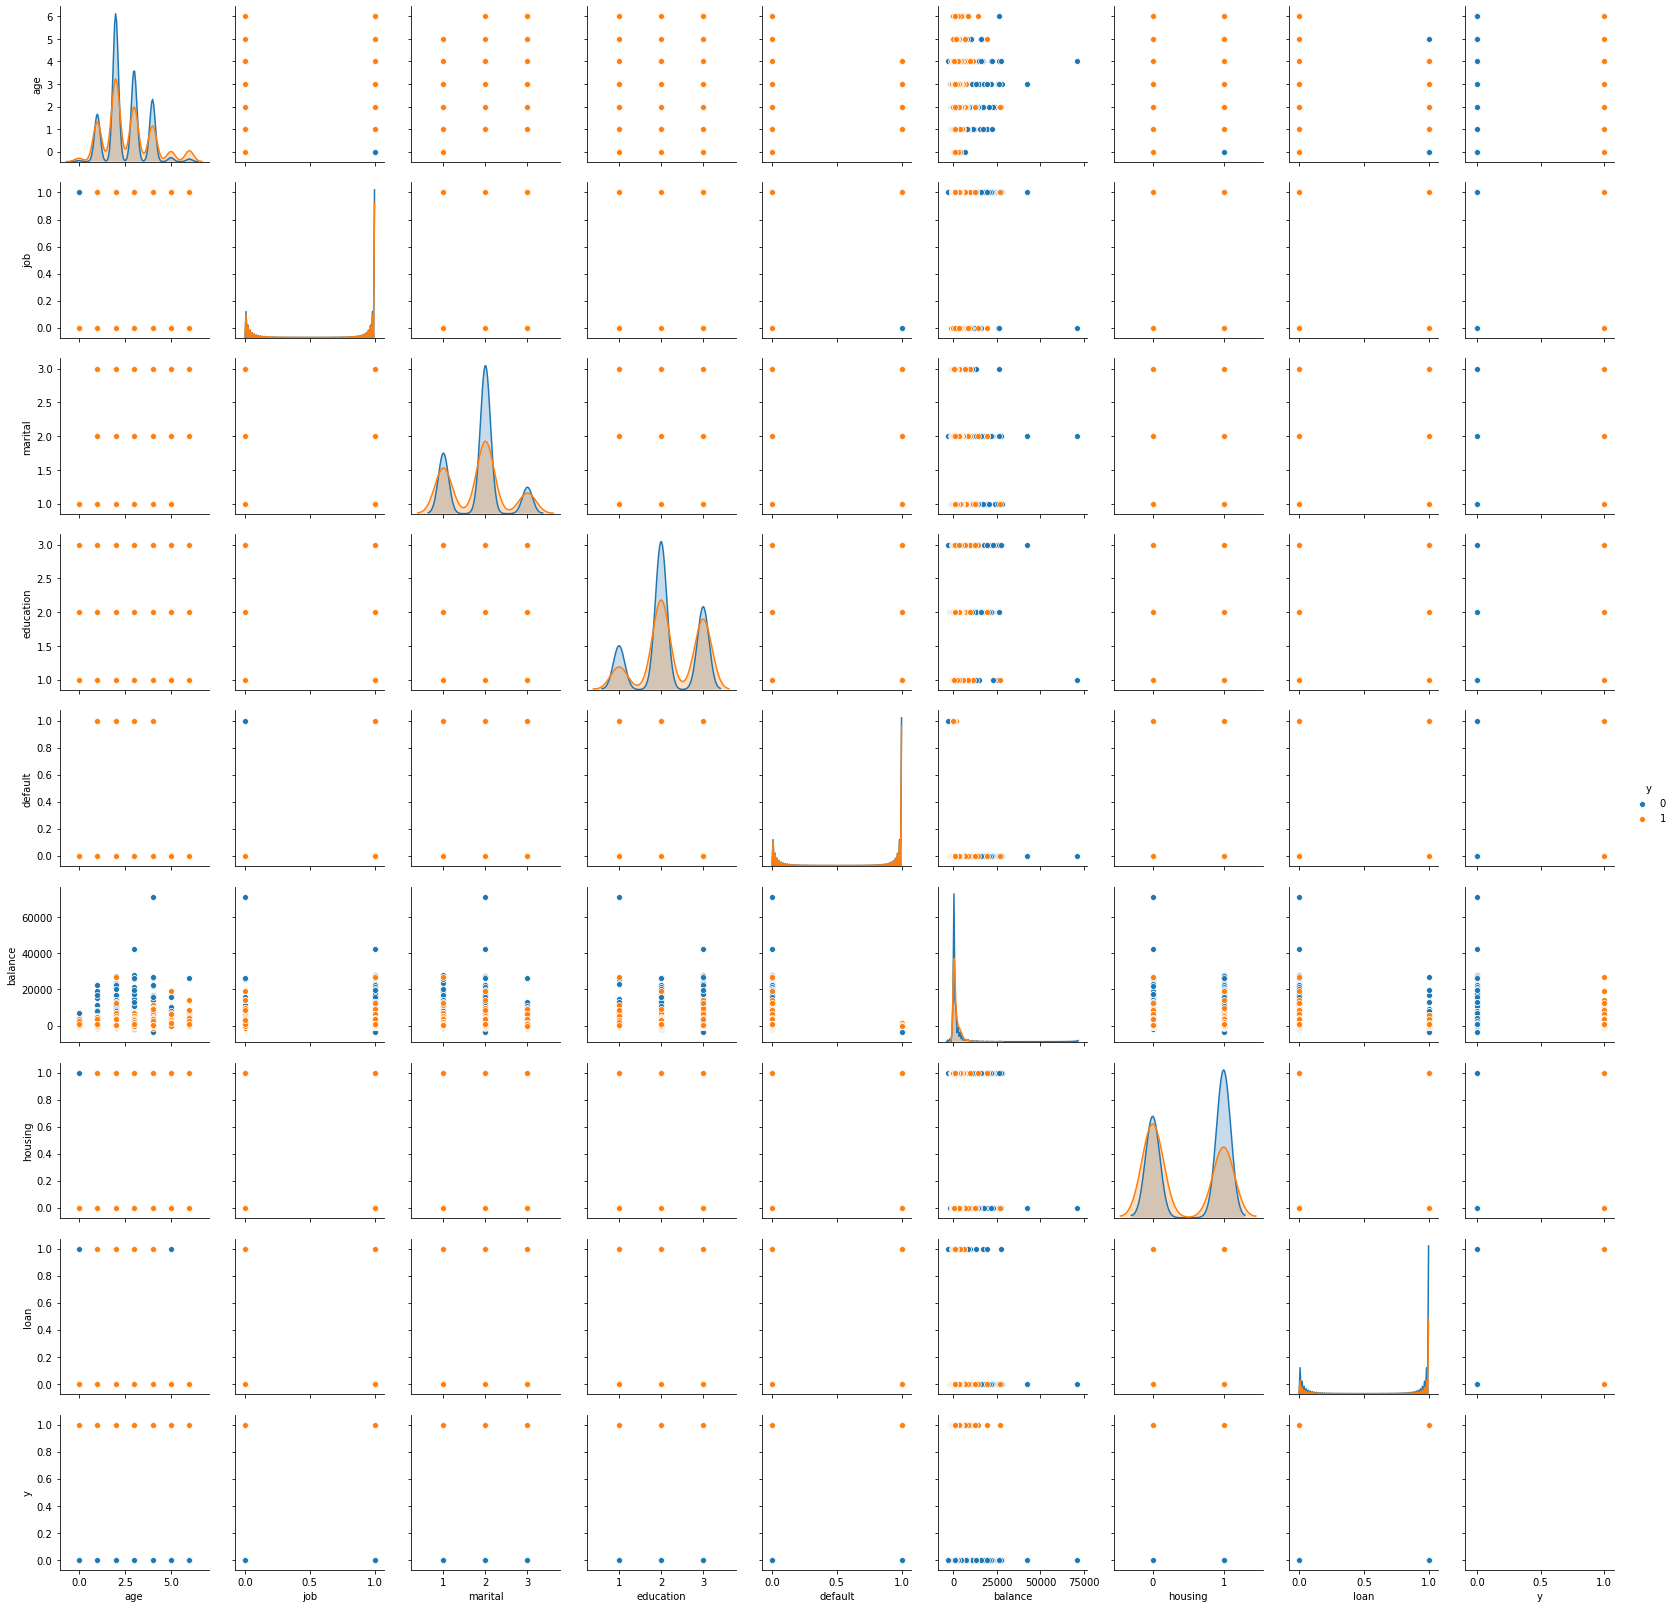

In [7]:
sb.pairplot (df, hue='y')  # Show different levels of a categorical variable by the color of plot elements
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [9]:
X_train.head()
y_train

4056    0
2751    0
4073    0
2127    0
4278    0
       ..
3610    0
487     0
3239    1
3953    0
898     0
Name: y, Length: 3233, dtype: int64

In [10]:
knn_model = KNeighborsClassifier(n_neighbors = 9) 
knn_model.fit(X_train, y_train) # train our model to the data set we have. The training set is all the data points

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [11]:
y_pred = knn_model.predict(X_test)

In [12]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [13]:
y_test

2906    0
1826    0
4173    0
3659    0
3298    0
       ..
1238    0
2434    0
854     0
4078    0
2008    0
Name: y, Length: 1078, dtype: int64

In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8979591836734694


In [15]:
import time
start = time.time()
knn_model.fit(X_train, y_train)
end= time.time()
speed = end - start
print(speed)

0.006980180740356445


In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[968,   1],
       [109,   0]], dtype=int64)

# After PCA

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [18]:
print(df.columns)
df.describe()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'y'],
      dtype='object')


,age,job,marital,education,default,balance,housing,loan,y
count,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000
mean,2.543261,0.904894,1.851311,2.155648,0.016933,1410.662723,0.574113,0.158432,0.115518
std,1.059011,0.293395,0.600017,0.665448,0.129037,3015.650889,0.494534,0.365188,0.319684
min,0.000000,0.000000,1.000000,1.000000,0.000000,-3313.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,2.000000,0.000000,66.500000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,2.000000,2.000000,0.000000,440.000000,1.000000,0.000000,0.000000
75%,3.000000,1.000000,2.000000,3.000000,0.000000,1456.000000,1.000000,0.000000,0.000000
max,6.000000,1.000000,3.000000,3.000000,1.000000,71188.000000,1.000000,1.000000,1.000000


In [19]:
from sklearn.preprocessing import StandardScaler
features = ['age','job','marital','education','default','balance','housing','loan']
x = df.loc[:,features].values
y = df.loc[:,['y']].values
x = StandardScaler().fit_transform(x)
pd.DataFrame(data=x, columns = features).head()

,age,job,marital,education,default,balance,housing,loan
0,-1.457436,-3.084580,0.247837,-1.736848,-0.131244,0.124809,-1.161051,-0.433887
1,-0.513049,0.324193,0.247837,-0.233927,-0.131244,1.120398,0.861289,2.304747
2,-0.513049,0.324193,-1.418974,1.268994,-0.131244,-0.020118,0.861289,-0.433887
3,-1.457436,0.324193,0.247837,1.268994,-0.131244,0.021669,0.861289,2.304747
4,1.375725,0.324193,0.247837,-0.233927,-0.131244,-0.467835,0.861289,-0.433887


In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1','principal component 2'
                                                                  ,'principal component 3','principal component 4'
                                                                  ,'principal component 5','principal component 6'])
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
0,1.325828,1.055645,-0.816110,-2.355560,-0.716315,0.893129
1,-0.373035,-1.013414,0.117927,1.404115,-0.646003,1.997172
2,-1.786538,0.632143,0.159217,-0.090444,0.180432,-0.104730
3,-1.574018,-0.988630,-0.581962,1.692238,-0.888623,0.797764
4,0.684018,-0.696565,0.792696,-0.160127,0.232912,-0.504604


In [21]:
finalDf = pd.concat([principalDf, df[['y']]],axis = 1)
#drop NaN columns
finalDf = finalDf.dropna()
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,y
0,1.325828,1.055645,-0.816110,-2.355560,-0.716315,0.893129,0.0
1,-0.373035,-1.013414,0.117927,1.404115,-0.646003,1.997172,0.0
2,-1.786538,0.632143,0.159217,-0.090444,0.180432,-0.104730,0.0
3,-1.574018,-0.988630,-0.581962,1.692238,-0.888623,0.797764,0.0
4,0.684018,-0.696565,0.792696,-0.160127,0.232912,-0.504604,0.0


C:\Users\eugen\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


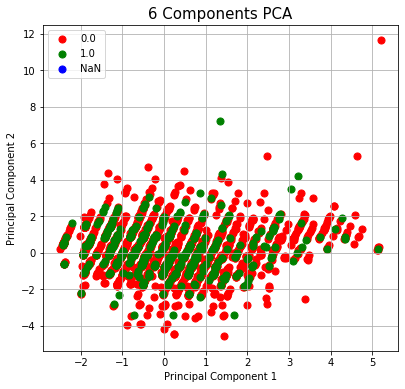

In [22]:
fig = plt.figure(figsize = (14,6))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel('Principal Component 1',fontsize = 10)
ax1.set_ylabel('Principal Component 2',fontsize = 10)

ax1.set_title('6 Components PCA',fontsize = 15)
targets = [0.0,1.0,'NaN']
colors = 'rgb'
for target , color in zip(targets,colors):
    indicesToKeep = finalDf['y'] == target
    ax1.scatter(finalDf.loc[indicesToKeep,'principal component 1']
               ,finalDf.loc[indicesToKeep,'principal component 2']
               ,c = color
               ,s = 50)
ax1.legend(targets)
ax1.grid()

In [23]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.20138465 0.15586271 0.13344624 0.12199225 0.11633165 0.11161944]
0.8406369342279691


In [24]:
pca.components_

array([[ 0.64719733, -0.41311907,  0.47816706, -0.32687786, -0.00640661,
         0.08965464, -0.25850738,  0.00838515],
       [-0.0081734 , -0.2990264 , -0.34889927,  0.34919904, -0.27575723,
         0.46212778, -0.47503462, -0.38933753],
       [ 0.061303  ,  0.26846692,  0.22350854, -0.19228519, -0.58083642,
         0.32128484,  0.49416981, -0.39043449],
       [ 0.1606755 ,  0.40895594,  0.36300684,  0.54717691, -0.07916214,
         0.34812955, -0.1334452 ,  0.48009732],
       [ 0.05742438,  0.13398612,  0.16961668,  0.12382636,  0.74821119,
         0.34084021,  0.17094165, -0.478993  ],
       [-0.08839382, -0.18898952, -0.3111586 , -0.38220023,  0.13584543,
         0.64480795,  0.22423654,  0.47860162]])

In [25]:
pca_all = PCA()
pca_all.fit(x)
W = pca_all.components_ # Z = W dot X.T
W

array([[ 0.64719733, -0.41311907,  0.47816706, -0.32687786, -0.00640661,
         0.08965464, -0.25850738,  0.00838515],
       [-0.0081734 , -0.2990264 , -0.34889927,  0.34919904, -0.27575723,
         0.46212778, -0.47503462, -0.38933753],
       [ 0.061303  ,  0.26846692,  0.22350854, -0.19228519, -0.58083642,
         0.32128484,  0.49416981, -0.39043449],
       [ 0.1606755 ,  0.40895594,  0.36300684,  0.54717691, -0.07916214,
         0.34812955, -0.1334452 ,  0.48009732],
       [ 0.05742438,  0.13398612,  0.16961668,  0.12382636,  0.74821119,
         0.34084021,  0.17094165, -0.478993  ],
       [-0.08839382, -0.18898952, -0.3111586 , -0.38220023,  0.13584543,
         0.64480795,  0.22423654,  0.47860162],
       [-0.01822056, -0.63801167,  0.12989619,  0.50240196, -0.03695363,
        -0.07569048,  0.55631018,  0.082175  ],
       [-0.73488171, -0.19967018,  0.57046737, -0.14497247, -0.02529375,
         0.12768494, -0.23774046, -0.01291969]])

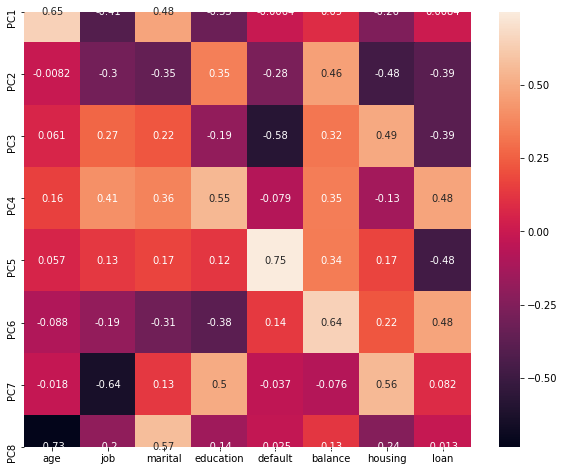

In [26]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(W, annot=True, ax=ax)
ax.set_yticklabels(['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8'])
ax.set_xticklabels(features)
plt.show()

# Train the model

In [27]:
new_df_x=finalDf[['principal component 1','principal component 2'
                   ,'principal component 3','principal component 4'
                   ,'principal component 5','principal component 6']]
new_df_y=finalDf['y']
new_df_x.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
0,1.325828,1.055645,-0.816110,-2.355560,-0.716315,0.893129
1,-0.373035,-1.013414,0.117927,1.404115,-0.646003,1.997172
2,-1.786538,0.632143,0.159217,-0.090444,0.180432,-0.104730
3,-1.574018,-0.988630,-0.581962,1.692238,-0.888623,0.797764
4,0.684018,-0.696565,0.792696,-0.160127,0.232912,-0.504604


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors = 9) 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

new_df_x_train, new_df_x_test, new_df_y_train, new_df_y_test = train_test_split(new_df_x, new_df_y, random_state = 42)

In [30]:
knn_model = KNeighborsClassifier(n_neighbors = 9) 

knn_model.fit(new_df_x_train, new_df_y_train) # train our model to the data set we have. The training set is all the data points

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [31]:
new_df_y_pred = knn_model.predict(new_df_x_test)
print(new_df_y_pred) # our prediction
print(new_df_y_test) # actual values

[0. 0. 0. ... 0. 0. 0.]
2468    0.0
3782    0.0
2859    0.0
2363    0.0
713     0.0
       ... 
2398    0.0
4159    1.0
4058    0.0
566     0.0
1479    0.0
Name: y, Length: 1027, dtype: float64


In [32]:
from sklearn.metrics import accuracy_score
print(accuracy_score(new_df_y_test, new_df_y_pred))

0.8860759493670886


In [33]:
import time
start = time.time()
knn_model.fit(new_df_x_train, new_df_y_train)
end= time.time()
speed = end - start
print(speed)

0.0029935836791992188


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(new_df_y_test, new_df_y_pred)

array([[910,   0],
       [117,   0]], dtype=int64)